In [244]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from prophet import Prophet

In [245]:
# Load the data from a CSV file
df = pd.read_csv("../data/pollofpolls.csv", sep=";")

In [246]:
#df

In [247]:
# Ensure the "Mnd" column is treated as a string (optional but recommended)
df["Mnd"] = df["Mnd"].astype(str)

# Create an empty dictionary for the predictions
predictions = {"Mnd": ["Februar-25", "Mars-25","April-25","Mai-25","Juni-25","Juli-25","August-25","September-25"]}


In [248]:
month_mapping = {
    "Januar": "January", "Februar": "February", "Mars": "March", "April": "April",
    "Mai": "May", "Juni": "June", "Juli": "July", "August": "August",
    "September": "September", "Oktober": "October", "November": "November", "Desember": "December"
}

# Replace Norwegian months with English
df["Mnd"] = df["Mnd"].replace(month_mapping, regex=True)

# Convert to datetime and set the date to the end of the month
df["Mnd"] = pd.to_datetime(df["Mnd"], format="%B-%y").dt.to_period("M").dt.to_timestamp("M")

# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)

#print(df)  # Check that dates are correctly formatted at month-end


In [249]:
# Loop through each column in the DataFrame and apply Prophet separately
future_predictions = {}

for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']: 
    df_prophet = df[[party]].reset_index()
    df_prophet.columns = ["ds", "y"]  # Prophet requires 'ds' (date) and 'y' (value)
    
    model = Prophet(interval_width=0.90)
    model.fit(df_prophet)
    # Create future dataframe
    future = model.make_future_dataframe(periods=8, freq='ME')  # 8 month-end predictions
    print(future)
    forecast = model.predict(future)
    
    future_predictions[party] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

14:00:49 - cmdstanpy - INFO - Chain [1] start processing
14:00:49 - cmdstanpy - INFO - Chain [1] done processing
14:00:49 - cmdstanpy - INFO - Chain [1] start processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:49 - cmdstanpy - INFO - Chain [1] done processing
14:00:49 - cmdstanpy - INFO - Chain [1] start processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:49 - cmdstanpy - INFO - Chain [1] done processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:49 - cmdstanpy - INFO - Chain [1] start processing
14:00:49 - cmdstanpy - INFO - Chain [1] done processing
14:00:50 - cmdstanpy - INFO - Chain [1] start processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:50 - cmdstanpy - INFO - Chain [1] done processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:50 - cmdstanpy - INFO - Chain [1] start processing
14:00:50 - cmdstanpy - INFO - Chain [1] done processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:50 - cmdstanpy - INFO - Chain [1] start processing
14:00:50 - cmdstanpy - INFO - Chain [1] done processing
14:00:51 - cmdstanpy - INFO - Chain [1] start processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:51 - cmdstanpy - INFO - Chain [1] done processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:51 - cmdstanpy - INFO - Chain [1] start processing
14:00:51 - cmdstanpy - INFO - Chain [1] done processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


14:00:51 - cmdstanpy - INFO - Chain [1] start processing
14:00:51 - cmdstanpy - INFO - Chain [1] done processing


            ds
0   2008-01-31
1   2008-02-29
2   2008-03-31
3   2008-04-30
4   2008-05-31
..         ...
209 2025-06-30
210 2025-07-31
211 2025-08-31
212 2025-09-30
213 2025-10-31

[214 rows x 1 columns]


In [250]:
df_prophet

,ds,y
0,2008-01-31,0.0
1,2008-02-29,0.0
2,2008-03-31,0.0
3,2008-04-30,0.0
4,2008-05-31,0.0
...,...,...
201,2024-10-31,3.7
202,2024-11-30,3.8
203,2024-12-31,3.5
204,2025-01-31,3.9


In [251]:
future_predictions = {}

# List of all parties
parties = ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG', 'Rodt', 'Andre']

for party in parties:
    # Create a dataframe for the target party with 'ds' (date) and 'y' (target party's values)
    df_prophet = df[[party]].reset_index()
    df_prophet.columns = ["ds", "y"]  # Rename columns to 'ds' (date) and 'y' (values of the target party)
    
    # Initialize the Prophet model
    model = Prophet(interval_width=0.90)
    
    # Add regressors to the model
    for otherparty in parties:
        if otherparty != party:
            df_prophet[otherparty] = df[otherparty].loc[df_prophet['ds']].values
            model.add_regressor(otherparty)

    #print(df_prophet)
    # Fit the model with the target party and regressors
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=7, freq='ME')  # 7 months ahead
    for otherparty in parties:
        if otherparty != party:
            # Get the last known value for this party from the original data
            historical_data = df[otherparty].values.tolist()
            future_values = []
            #hist_values=pd.Series(df[otherparty].loc[df_prophet['ds']].values)
            
            for i in range(7):  # 7 future periods
                window = historical_data[-2:]  # You can adjust the window size here
                moving_avg = sum(window) / len(window)  # You can use a different method if needed
                future_values.append(moving_avg)
                historical_data.append(moving_avg)
        
            # Fill the past rows with the known values
            future[otherparty] = pd.concat([pd.Series(df[otherparty].loc[df_prophet['ds']].values), pd.Series(future_values, index=future.tail(7).index)])

    
    #print(df_prophet)
    print(future)
    forecast = model.predict(future)
    future_predictions[party] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

14:00:52 - cmdstanpy - INFO - Chain [1] start processing
14:00:52 - cmdstanpy - INFO - Chain [1] done processing


            ds      Hoyre        Frp        SV        Sp       KrF   Venstre  \
0   2008-01-31  17.200000  23.900000  7.400000  6.100000  6.400000  6.500000   
1   2008-02-29  17.300000  25.200000  6.700000  5.900000  6.300000  6.600000   
2   2008-03-31  18.100000  25.200000  7.000000  5.600000  6.100000  6.300000   
3   2008-04-30  16.900000  25.400000  6.500000  5.500000  7.000000  6.800000   
4   2008-05-31  17.800000  25.900000  6.700000  5.700000  6.200000  6.200000   
..         ...        ...        ...       ...       ...       ...       ...   
208 2025-05-31  19.825000  24.412500  7.625000  6.337500  3.150000  4.312500   
209 2025-06-30  19.587500  24.443750  7.587500  6.381250  3.125000  4.293750   
210 2025-07-31  19.706250  24.428125  7.606250  6.359375  3.137500  4.303125   
211 2025-08-31  19.646875  24.435938  7.596875  6.370312  3.131250  4.298438   
212 2025-09-30  19.676562  24.432031  7.601562  6.364844  3.134375  4.300781   

          MDG      Rodt     Andre  
0  

14:00:52 - cmdstanpy - INFO - Chain [1] start processing
14:00:52 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap        Frp        SV        Sp       KrF   Venstre  \
0   2008-01-31  29.300000  23.900000  7.400000  6.100000  6.400000  6.500000   
1   2008-02-29  29.000000  25.200000  6.700000  5.900000  6.300000  6.600000   
2   2008-03-31  28.700000  25.200000  7.000000  5.600000  6.100000  6.300000   
3   2008-04-30  29.000000  25.400000  6.500000  5.500000  7.000000  6.800000   
4   2008-05-31  28.900000  25.900000  6.700000  5.700000  6.200000  6.200000   
..         ...        ...        ...       ...       ...       ...       ...   
208 2025-05-31  22.662500  24.412500  7.625000  6.337500  3.150000  4.312500   
209 2025-06-30  23.018750  24.443750  7.587500  6.381250  3.125000  4.293750   
210 2025-07-31  22.840625  24.428125  7.606250  6.359375  3.137500  4.303125   
211 2025-08-31  22.929688  24.435938  7.596875  6.370312  3.131250  4.298438   
212 2025-09-30  22.885156  24.432031  7.601562  6.364844  3.134375  4.300781   

          MDG      Rodt     Andre  
0  

14:00:52 - cmdstanpy - INFO - Chain [1] start processing
14:00:52 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        SV        Sp       KrF   Venstre  \
0   2008-01-31  29.300000  17.200000  7.400000  6.100000  6.400000  6.500000   
1   2008-02-29  29.000000  17.300000  6.700000  5.900000  6.300000  6.600000   
2   2008-03-31  28.700000  18.100000  7.000000  5.600000  6.100000  6.300000   
3   2008-04-30  29.000000  16.900000  6.500000  5.500000  7.000000  6.800000   
4   2008-05-31  28.900000  17.800000  6.700000  5.700000  6.200000  6.200000   
..         ...        ...        ...       ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  7.625000  6.337500  3.150000  4.312500   
209 2025-06-30  23.018750  19.587500  7.587500  6.381250  3.125000  4.293750   
210 2025-07-31  22.840625  19.706250  7.606250  6.359375  3.137500  4.303125   
211 2025-08-31  22.929688  19.646875  7.596875  6.370312  3.131250  4.298438   
212 2025-09-30  22.885156  19.676562  7.601562  6.364844  3.134375  4.300781   

          MDG      Rodt     Andre  
0  

14:00:53 - cmdstanpy - INFO - Chain [1] start processing
14:00:53 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        Sp       KrF   Venstre  \
0   2008-01-31  29.300000  17.200000  23.900000  6.100000  6.400000  6.500000   
1   2008-02-29  29.000000  17.300000  25.200000  5.900000  6.300000  6.600000   
2   2008-03-31  28.700000  18.100000  25.200000  5.600000  6.100000  6.300000   
3   2008-04-30  29.000000  16.900000  25.400000  5.500000  7.000000  6.800000   
4   2008-05-31  28.900000  17.800000  25.900000  5.700000  6.200000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  6.337500  3.150000  4.312500   
209 2025-06-30  23.018750  19.587500  24.443750  6.381250  3.125000  4.293750   
210 2025-07-31  22.840625  19.706250  24.428125  6.359375  3.137500  4.303125   
211 2025-08-31  22.929688  19.646875  24.435938  6.370312  3.131250  4.298438   
212 2025-09-30  22.885156  19.676562  24.432031  6.364844  3.134375  4.300781   

          MDG      Rodt    

14:00:53 - cmdstanpy - INFO - Chain [1] start processing
14:00:53 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        SV       KrF   Venstre  \
0   2008-01-31  29.300000  17.200000  23.900000  7.400000  6.400000  6.500000   
1   2008-02-29  29.000000  17.300000  25.200000  6.700000  6.300000  6.600000   
2   2008-03-31  28.700000  18.100000  25.200000  7.000000  6.100000  6.300000   
3   2008-04-30  29.000000  16.900000  25.400000  6.500000  7.000000  6.800000   
4   2008-05-31  28.900000  17.800000  25.900000  6.700000  6.200000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  7.625000  3.150000  4.312500   
209 2025-06-30  23.018750  19.587500  24.443750  7.587500  3.125000  4.293750   
210 2025-07-31  22.840625  19.706250  24.428125  7.606250  3.137500  4.303125   
211 2025-08-31  22.929688  19.646875  24.435938  7.596875  3.131250  4.298438   
212 2025-09-30  22.885156  19.676562  24.432031  7.601562  3.134375  4.300781   

          MDG      Rodt    

14:00:53 - cmdstanpy - INFO - Chain [1] start processing
14:00:53 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        SV        Sp   Venstre  \
0   2008-01-31  29.300000  17.200000  23.900000  7.400000  6.100000  6.500000   
1   2008-02-29  29.000000  17.300000  25.200000  6.700000  5.900000  6.600000   
2   2008-03-31  28.700000  18.100000  25.200000  7.000000  5.600000  6.300000   
3   2008-04-30  29.000000  16.900000  25.400000  6.500000  5.500000  6.800000   
4   2008-05-31  28.900000  17.800000  25.900000  6.700000  5.700000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  7.625000  6.337500  4.312500   
209 2025-06-30  23.018750  19.587500  24.443750  7.587500  6.381250  4.293750   
210 2025-07-31  22.840625  19.706250  24.428125  7.606250  6.359375  4.303125   
211 2025-08-31  22.929688  19.646875  24.435938  7.596875  6.370312  4.298438   
212 2025-09-30  22.885156  19.676562  24.432031  7.601562  6.364844  4.300781   

          MDG      Rodt    

14:00:54 - cmdstanpy - INFO - Chain [1] start processing
14:00:54 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        SV        Sp       KrF  \
0   2008-01-31  29.300000  17.200000  23.900000  7.400000  6.100000  6.400000   
1   2008-02-29  29.000000  17.300000  25.200000  6.700000  5.900000  6.300000   
2   2008-03-31  28.700000  18.100000  25.200000  7.000000  5.600000  6.100000   
3   2008-04-30  29.000000  16.900000  25.400000  6.500000  5.500000  7.000000   
4   2008-05-31  28.900000  17.800000  25.900000  6.700000  5.700000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  7.625000  6.337500  3.150000   
209 2025-06-30  23.018750  19.587500  24.443750  7.587500  6.381250  3.125000   
210 2025-07-31  22.840625  19.706250  24.428125  7.606250  6.359375  3.137500   
211 2025-08-31  22.929688  19.646875  24.435938  7.596875  6.370312  3.131250   
212 2025-09-30  22.885156  19.676562  24.432031  7.601562  6.364844  3.134375   

          MDG      Rodt    

14:00:54 - cmdstanpy - INFO - Chain [1] start processing
14:00:54 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        SV        Sp       KrF  \
0   2008-01-31  29.300000  17.200000  23.900000  7.400000  6.100000  6.400000   
1   2008-02-29  29.000000  17.300000  25.200000  6.700000  5.900000  6.300000   
2   2008-03-31  28.700000  18.100000  25.200000  7.000000  5.600000  6.100000   
3   2008-04-30  29.000000  16.900000  25.400000  6.500000  5.500000  7.000000   
4   2008-05-31  28.900000  17.800000  25.900000  6.700000  5.700000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  7.625000  6.337500  3.150000   
209 2025-06-30  23.018750  19.587500  24.443750  7.587500  6.381250  3.125000   
210 2025-07-31  22.840625  19.706250  24.428125  7.606250  6.359375  3.137500   
211 2025-08-31  22.929688  19.646875  24.435938  7.596875  6.370312  3.131250   
212 2025-09-30  22.885156  19.676562  24.432031  7.601562  6.364844  3.134375   

      Venstre      Rodt    

14:00:54 - cmdstanpy - INFO - Chain [1] start processing
14:00:55 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        SV        Sp       KrF  \
0   2008-01-31  29.300000  17.200000  23.900000  7.400000  6.100000  6.400000   
1   2008-02-29  29.000000  17.300000  25.200000  6.700000  5.900000  6.300000   
2   2008-03-31  28.700000  18.100000  25.200000  7.000000  5.600000  6.100000   
3   2008-04-30  29.000000  16.900000  25.400000  6.500000  5.500000  7.000000   
4   2008-05-31  28.900000  17.800000  25.900000  6.700000  5.700000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  7.625000  6.337500  3.150000   
209 2025-06-30  23.018750  19.587500  24.443750  7.587500  6.381250  3.125000   
210 2025-07-31  22.840625  19.706250  24.428125  7.606250  6.359375  3.137500   
211 2025-08-31  22.929688  19.646875  24.435938  7.596875  6.370312  3.131250   
212 2025-09-30  22.885156  19.676562  24.432031  7.601562  6.364844  3.134375   

      Venstre       MDG    

14:00:55 - cmdstanpy - INFO - Chain [1] start processing
14:00:55 - cmdstanpy - INFO - Chain [1] done processing


            ds         Ap      Hoyre        Frp        SV        Sp       KrF  \
0   2008-01-31  29.300000  17.200000  23.900000  7.400000  6.100000  6.400000   
1   2008-02-29  29.000000  17.300000  25.200000  6.700000  5.900000  6.300000   
2   2008-03-31  28.700000  18.100000  25.200000  7.000000  5.600000  6.100000   
3   2008-04-30  29.000000  16.900000  25.400000  6.500000  5.500000  7.000000   
4   2008-05-31  28.900000  17.800000  25.900000  6.700000  5.700000  6.200000   
..         ...        ...        ...        ...       ...       ...       ...   
208 2025-05-31  22.662500  19.825000  24.412500  7.625000  6.337500  3.150000   
209 2025-06-30  23.018750  19.587500  24.443750  7.587500  6.381250  3.125000   
210 2025-07-31  22.840625  19.706250  24.428125  7.606250  6.359375  3.137500   
211 2025-08-31  22.929688  19.646875  24.435938  7.596875  6.370312  3.131250   
212 2025-09-30  22.885156  19.676562  24.432031  7.601562  6.364844  3.134375   

      Venstre       MDG    

In [252]:
future_predictions

{'Ap':             ds       yhat  yhat_lower  yhat_upper
 0   2008-01-31  29.524272   29.076671   29.965992
 1   2008-02-29  29.022746   28.568309   29.443476
 2   2008-03-31  28.959259   28.535924   29.379201
 3   2008-04-30  29.049468   28.585284   29.475546
 4   2008-05-31  28.476221   28.040842   28.896572
 ..         ...        ...         ...         ...
 208 2025-05-31  22.788072   22.341482   23.238390
 209 2025-06-30  23.040732   22.604065   23.468570
 210 2025-07-31  22.880184   22.454257   23.308590
 211 2025-08-31  23.023010   22.600285   23.466603
 212 2025-09-30  22.891250   22.457399   23.330683
 
 [213 rows x 4 columns],
 'Hoyre':             ds       yhat  yhat_lower  yhat_upper
 0   2008-01-31  17.336320   16.891083   17.806909
 1   2008-02-29  17.234239   16.783585   17.679995
 2   2008-03-31  18.287331   17.845745   18.739290
 3   2008-04-30  16.915903   16.480717   17.366633
 4   2008-05-31  17.315921   16.846767   17.771757
 ..         ...        ...         ...  

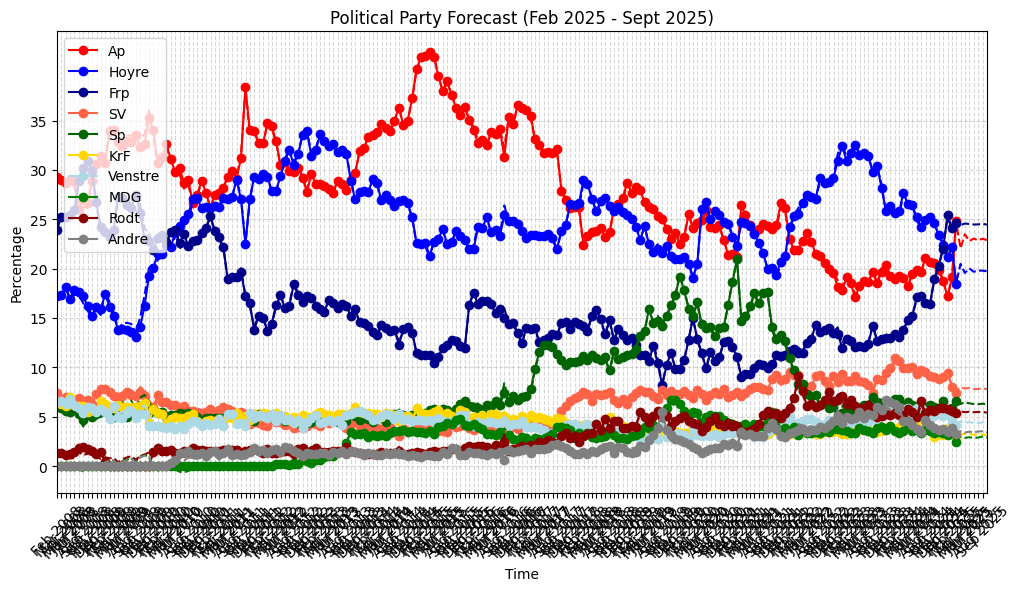

In [253]:

plt.figure(figsize=(12, 6))

# Define a color map for consistency
colors = {
    'Ap': '#FF0000',        # Red
    'Hoyre': '#0000FF',     # Blue
    'Frp': '#00008B',       # Dark Blue
    'SV': '#FF6347',        # Light Red (Tomato)
    'Sp': '#006400',        # Dark Green
    'KrF': '#FFD700',       # Yellow (Gold)
    'Venstre': '#ADD8E6',   # Light Blue
    'MDG': '#008000',       # Green
    'Rodt': '#8B0000',      # Dark Red
    'Andre': '#808080'      # Gray
}

for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG', 'Rodt', 'Andre']:
    color = colors.get(party, np.random.rand(3,))  # Use predefined color or random if missing
    
    # Plot actual data
    plt.plot(df.index, df[party], marker="o", color=color, label=f"{party}")
    
    # Check if forecast exists for this party
    if party in future_predictions:
        forecast_df = future_predictions[party]  # Get forecast dataframe for this party
        
        # Plot Prophet's forecast (dashed line)
        plt.plot(forecast_df['ds'], forecast_df['yhat'], linestyle="dashed", color=color)

# Set x-axis limits: Min from original data, max to Sept 2025
plt.xlim(df.index.min(), np.datetime64("2025-09-30"))  # Manually set max date to Sept 2025

# Set x-axis ticks for only months where we have data
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Auto-detect month positions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Jan 2025"

# Format y-axis for every whole percentage
plt.yticks(np.arange(0, 40, 5))  # Assuming percentages from 0 to 100

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.5)  # Light dashed grid

plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title("Political Party Forecast (Feb 2025 - Sept 2025)")

# Move legend to the upper left
plt.legend(loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


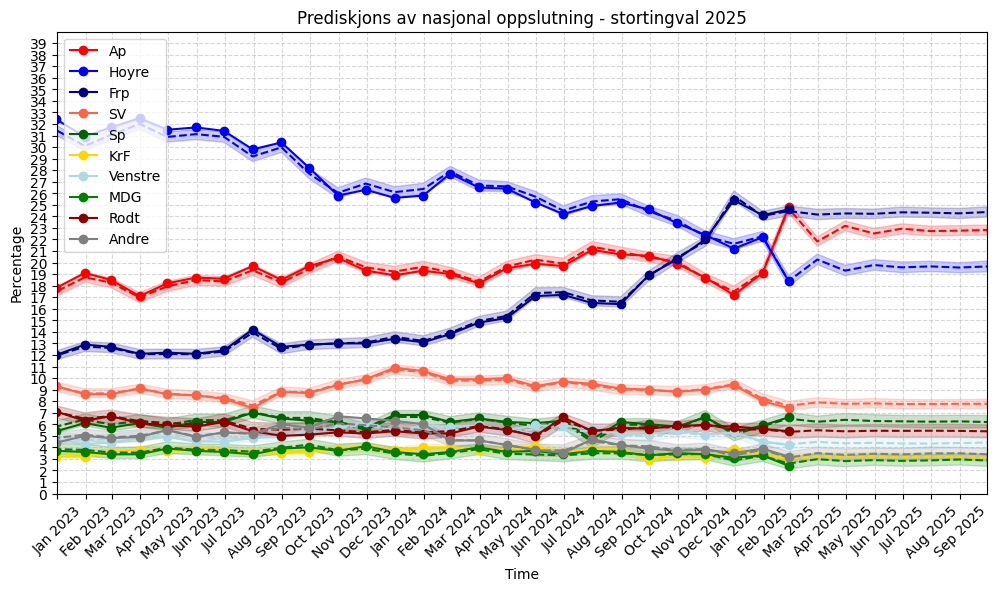

In [254]:
plt.figure(figsize=(12, 6))

# Define a color map for consistency
colors = {
    'Ap': '#FF0000',        # Red
    'Hoyre': '#0000FF',     # Blue
    'Frp': '#00008B',       # Dark Blue
    'SV': '#FF6347',        # Light Red (Tomato)
    'Sp': '#006400',        # Dark Green
    'KrF': '#FFD700',       # Yellow (Gold)
    'Venstre': '#ADD8E6',   # Light Blue
    'MDG': '#008000',       # Green
    'Rodt': '#8B0000',      # Dark Red
    'Andre': '#808080'      # Gray
}

# Collect all forecasts in a new dataframe for normalization
scaled_forecasts = {}

# Normalize the predictions at each time step
all_dates = future_predictions['Ap']['ds']  # Assume all parties share the same time steps
total_sums = np.zeros(len(all_dates))  # Initialize sum array

# Step 1: Compute total sum per time step
for party in future_predictions.keys():
    total_sums += future_predictions[party]['yhat'].values

# Step 2: Normalize each party's forecast
for party in future_predictions.keys():
    forecast_df = future_predictions[party].copy()
    forecast_df['yhat'] = (forecast_df['yhat'] / total_sums) * 100  # Normalize to sum 100%
    forecast_df['yhat_lower'] = (forecast_df['yhat_lower'] / total_sums) * 100
    forecast_df['yhat_upper'] = (forecast_df['yhat_upper'] / total_sums) * 100
    scaled_forecasts[party] = forecast_df  # Store scaled results

# Plot actual and scaled forecasts
for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG', 'Rodt', 'Andre']:
    color = colors.get(party, np.random.rand(3,))  # Use predefined color or random if missing
    
    # Plot actual data
    plt.plot(df.index, df[party], marker="o", color=color, label=f"{party}")
    
    # Check if forecast exists for this party
    if party in scaled_forecasts:
        forecast_df = scaled_forecasts[party]  # Get scaled forecast dataframe
        
        # Plot Prophet's forecast (dashed line)
        plt.plot(forecast_df['ds'], forecast_df['yhat'], linestyle="dashed", color=color)

        # Plot confidence interval as a shaded region
        plt.fill_between(
            forecast_df['ds'], 
            forecast_df['yhat_lower'], 
            forecast_df['yhat_upper'], 
            color=color, 
            alpha=0.2  # Transparency level
        )

# Set x-axis limits: Min from original data, max to Sept 2025
plt.xlim(df.index.min(), np.datetime64("2025-09-30"))  # Manually set max date to Sept 2025

# Set x-axis ticks for only months where we have data
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Auto-detect month positions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Jan 2025"

# Format y-axis for every whole percentage
plt.yticks(np.arange(0, 40, 1))  # Assuming percentages from 0 to 100

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.5)  # Light dashed grid

plt.xlim(np.datetime64("2023-01-01"), np.datetime64("2025-09-30"))  # Manually set max date to Sept 2025
plt.ylim(0,40)  # Manually set max date to Sept 2025
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title("Prediskjons av nasjonal oppslutning - stortingval 2025")

# Move legend to the upper left
plt.legend(loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [255]:
parties=['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG', 'Rodt', 'Andre']

In [256]:
results = []

In [257]:
for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG', 'Rodt', 'Andre']:
    forecast_df = scaled_forecasts[party]
    res=scaled_forecasts[party][scaled_forecasts[party]["ds"] == '2025-09-30']
    for _, row in res.iterrows():
        results.append({
            "party": party,
            "estimate": row["yhat"],
            "lower": row["yhat_lower"],
            "high": row["yhat_upper"]
        })

In [258]:
all_pred = pd.DataFrame(results)

In [259]:
all_pred

,party,estimate,lower,high
0,Ap,22.814287,22.381895,23.252243
1,Hoyre,19.660739,19.187517,20.128527
2,Frp,24.373173,23.936353,24.822233
3,SV,7.767586,7.374064,8.164842
4,Sp,6.195009,5.685071,6.753313
5,KrF,3.108776,2.778105,3.448459
6,Venstre,4.415754,3.966732,4.850522
7,MDG,2.870948,2.354443,3.393900
8,Rodt,5.390390,4.840519,5.951386
9,Andre,3.403339,2.880807,3.898962


In [260]:
scaled_forecasts["Ap"][scaled_forecasts["Ap"]["ds"] == '2025-09-30']

,ds,yhat,yhat_lower,yhat_upper
212,2025-09-30,22.814287,22.381895,23.252243
